# Netflix: Data Exploration and Visualisation 

## 1 Overview

### 1.1 Problem Statement

#### About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10,000 Movies or TV-Shows available on their platform, as of mid-2021, they have over 222M Subscribers globally.

#### Business Problem

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

### 1.2 About Dataset

#### Features

Lets use the generic word **Content** to represent a Movie or TV Show, hence each row or data-point in the dataset represents an individual content available in Netflix.

The tabular dataset consists of listings of all the contents available on Netflix, described using below list of features:

1. `show_id`: Unique ID for a content
1. `type`: Identifier - A Movie or TV Show
1. `title`: Title of the content
1. `director`: Director of the content
1. `cast`: Actors involved in the content
1. `country`: Country where the content was produced
1. `date_added`: Date it was added on Netflix
1. `release_year`: Actual Release year of the content
1. `rating`: TV Rating of the content
1. `duration`: Total Duration - in minutes or number of seasons
1. `listed_in`: Genre
1. `description`: The summary description

### 1.3 Objective

Objective of this case study is to perform an Exploratory Data Analysis (EDA) on the dataset and attempt to:

1. Extract some business insights.
2.  Formulate some recommendations based on any patterns observed in the dataset.

#### Business Insights

Lets try to derive below business insights from the given dataset:

1. What type of content is available in different countries?
1. How has the number of movies released per year changed over the last 20-30 years?
1. Comparison of TV-shows vs. Movies.
1. What is the best time to launch a TV show?
1. Analysis of actors/directors of different types of shows/movies.
1. Does Netflix has more focus on TV-Shows than movies in recent years.
1. Understanding what content is available in different countries.

#### Recommendations

##### Disclaimer

Dataset is **missing any sort of user feedback**, like content rating or reviews, which makes it difficult to recommend any business strategy.

Lets try to formulate below recommendations (if possible) based on the content in the dataset.

1. What should Netflix focus more between TV-Shows and Movies?
2. When is the best time to launch a TV show?
3. Need for diversification of content globally?

## 2 Setup

### 2.1 Libraries

#### Import Libraries

In [1]:
# General libraries.
import re
from datetime import datetime

# Data manipulation libraries.
import numpy as np
import pandas as pd

# Data visualization libraries.
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud


print("NumPy version:", np.__version__)
print("Pandas version:", pd.__version__)
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", sns.__version__)
print("Wordcloud version:", wordcloud.__version__)

NumPy version: 2.3.1
Pandas version: 2.3.1
Matplotlib version: 3.10.3
Seaborn version: 0.13.2
Wordcloud version: 1.9.4


#### Configure Libraries

In [2]:
# Configure Numpy.
np.set_printoptions(linewidth=130)

# Configure Pandas.
pd.options.display.width = 130

# Configure Seaborn.
sns.set_style("whitegrid")
sns.set_palette("deep")
sns.set_context("paper", font_scale=1.2)

#### Helper functions

In [3]:
def display_empty_columns_count(df: pd.DataFrame):
    """
    Function to print columns with missing values greater than zero.
    """
    empty_count_df = df.isna().sum().reset_index(name="count")
    fltr = empty_count_df["count"] > 0
    display(empty_count_df[fltr])


def split_strip_unique(value_str: str):
    """
    Function to return unique values from `value_str`
    after splitting it by coma ',' and trimming spaces.
    """
    return {v.strip().lower().title() for v in value_str.split(",") if len(v.strip()) > 0}


def sort_values(values_str: str):
    """
    Function to sort values in coma separated `values_str` string.
    """
    unq_values = split_strip_unique(values_str)
    return ",".join(sorted(unq_values))


def values_count(values_str: str):
    """
    Function to get values count in `values_str` string.
    """
    return len(values_str.split(","))

### 2.2 Dataset

#### Import DataSet

In [4]:
nf_df = pd.read_csv("data/netflix.csv")

row_count, col_count = nf_df.shape

display(nf_df.head(3))
print(f"Dataset has {row_count} rows and {col_count} columns.")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


Dataset has 8807 rows and 12 columns.


### 2.3 Data Profiling

In [5]:
nf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


###### Observations

1. Except `release_year` all other features are of datatype string.
2. `release_year` is of datatype integer.
3. Lets convert `date_added` to Date-Time later during Data Wrangling.
4. `duration` feature is of type string and can it be converted to integer (in minutes).
5. `rating` feature is of type string and check if can be converted to integer (and categorical).

#### 1 Feature types

List of categorical features:

1. type
2. country
3. rating
4. listed_in

List of Numerical features:

1. date_added
2. release_year
3. duration

List of high cardinality features:

1. show_id
2. title
3. director
4. cast
5. description

#### 2 Cardinality

In [6]:
nf_df.nunique().sort_values(ascending=False)

show_id         8807
title           8807
description     8775
cast            7692
director        4528
date_added      1767
country          748
listed_in        514
duration         220
release_year      74
rating            17
type               2
dtype: int64

###### Observations

1. Its obvious that features like `show_id`, `title`, `director`, `cast` and `description` will have high cardinality.
2. Features like `country` and `listed_in` (genre) have unexpectedly high cadinality considering the nature of the features.
3. Later lets try to reduce cardinality of features like `rating`, `listed_in`, etc.

#### 3 Empty Check

In [7]:
display_empty_columns_count(nf_df)

,index,count
3,director,2634
4,cast,825
5,country,831
6,date_added,10
8,rating,4
9,duration,3


#### 4 Duplicate check

In [8]:
nf_df[nf_df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


##### Observations

There are no duplicate records in the dataset.

## 3 Data Wrangling

Under Data Wrangling lets perform these operations:

1. Cleaning
2. Structuring
3. Fill missing values
4. Transform features
5. Feature engineering

### 3.1 Cleaning

#### 1 Feature `duration`

In [9]:
compact_view = nf_df.columns.drop(["show_id", "description"])

In [10]:
fltr = nf_df["duration"].isna()
nf_df.loc[fltr, compact_view]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
5541,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies
5794,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies
5813,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies


In [11]:
ids = [5541, 5794, 5813]
nf_df.loc[ids, "duration"] = nf_df.loc[ids, "rating"]
nf_df.loc[ids, "rating"] = "UR"

#### 2 Feature `rating`

Different ratings between Movies and TV-Shows:

In [12]:
print("Unique ratings before cleaning:")
nf_df.groupby("type")["rating"].value_counts()

Unique ratings before cleaning:


type     rating  
Movie    TV-MA       2062
         TV-14       1427
         R            797
         TV-PG        540
         PG-13        490
         PG           287
         TV-Y7        139
         TV-Y         131
         TV-G         126
         NR            75
         G             41
         UR             6
         TV-Y7-FV       5
         NC-17          3
TV Show  TV-MA       1145
         TV-14        733
         TV-PG        323
         TV-Y7        195
         TV-Y         176
         TV-G          94
         NR             5
         R              2
         TV-Y7-FV       1
Name: count, dtype: int64

1. Since "UR" (unrated) and "NR" (not rated) mean the same they can be combined.
2. "G" (General Audience) and "TV-G" (TV General Audience) represent same rating (but used separately for movies and TV-shows), they can be combined.
3. "NC-17" (strictly 18+) and "MA" (Mature Audience) mean the same they can be combined.
4. Since there isn't much difference between "TV-Y7-FV" and "TV-Y7", they can be combined.

In [13]:
nf_df["rating"] = nf_df["rating"].replace(
    {
        "UR": "NR",
        "G": "TV-G",
        "NC-17": "TV-MA",
        "TV-Y7-FV": "TV-Y7",
    }
)

print("Unique ratings after cleaning:")
nf_df.groupby("type")["rating"].value_counts()

Unique ratings after cleaning:


type     rating
Movie    TV-MA     2065
         TV-14     1427
         R          797
         TV-PG      540
         PG-13      490
         PG         287
         TV-G       167
         TV-Y7      144
         TV-Y       131
         NR          81
TV Show  TV-MA     1145
         TV-14      733
         TV-PG      323
         TV-Y7      196
         TV-Y       176
         TV-G        94
         NR           5
         R            2
Name: count, dtype: int64

### 3.2 Structuring

#### 1 Feature `country`

In [14]:
ctry_card_bfr = nf_df["country"].nunique()
print("Cardinality of `country` before structuring: ", ctry_card_bfr)

Cardinality of `country` before structuring:  748


Sort countries in coma separated country string.

In [15]:
fltr = nf_df["country"].notna()
nf_df["country"] = nf_df.loc[fltr, "country"].apply(sort_values)

ctry_card_aft = nf_df["country"].nunique()
print("Cardinality of `country` after structuring:", ctry_card_aft)

Cardinality of `country` after structuring: 607


###### Observations

After restructuring the countries in `country` feature the cadinality has reduced from 748 to 607.

#### 2 Feature `director`

In [16]:
dir_card_bfr = nf_df["director"].nunique()
print("Cardinality of `director` before structuring:", dir_card_bfr)

Cardinality of `director` before structuring: 4528


Sort directors in coma separated director names.

In [17]:
fltr = nf_df["director"].notna()
nf_df["director"] = nf_df.loc[fltr, "director"].apply(sort_values)

dir_card_aft = nf_df["director"].nunique()
print("Cardinality of `director` after structuring:", dir_card_aft)

Cardinality of `director` after structuring: 4511


###### Observations

After restructuring the directors in `director` feature the cadinality has reduced from 4528 to 4511.

#### 3 Feature `cast`

In [18]:
cast_card_bfr = nf_df["cast"].nunique()
print("Cardinality of `cast` before structuring:", cast_card_bfr)

Cardinality of `cast` before structuring: 7692


Sort actors in coma separated cast names.

In [19]:
fltr = nf_df["cast"].notna()
nf_df["cast"] = nf_df.loc[fltr, "cast"].apply(sort_values)

cast_card_aft = nf_df["cast"].nunique()
print("Cardinality of `cast` after structuring:", cast_card_aft)

Cardinality of `cast` after structuring: 7678


###### Observations

After restructuring the actors in `cast` feature the cadinality has reduced from 7692 to 7678.

### 3.3 Fill missing values

#### 1 Feature `rating`

In [20]:
rat_mis_bfr = nf_df["rating"].isna().sum().item()
print(f"{rat_mis_bfr} records are missing `rating` before attempting to fill NA.")

4 records are missing `rating` before attempting to fill NA.


Lets fill missing `ratings` with most common rating among the content-type and genre.

In [21]:
rat_mode_df = (
    nf_df.groupby(["type", "listed_in"])["rating"]
    .agg(lambda r_val: r_val.mode().iloc[0])
    .reset_index()
)

rat_merged_df = nf_df.merge(
    rat_mode_df,
    left_on=["type", "listed_in"],
    right_on=["type", "listed_in"],
    how="left",
)

nf_df["rating"] = nf_df["rating"].fillna(rat_merged_df["rating_y"])

rat_mis_aft = nf_df["rating"].isna().sum().item()
print(f"{rat_mis_aft} records are missing `rating` after attempting to fill NA.")

0 records are missing `rating` after attempting to fill NA.


#### 2 Feature `date_added`

In [22]:
da_mis_bfr = nf_df["date_added"].isna().sum().item()
print(f"{da_mis_bfr} records are missing `date_added` before attempting to fill NA.")

10 records are missing `date_added` before attempting to fill NA.


Lets fill missing `date_added` with most common date from similar content from country, content-type and release-year.

In [23]:
da_mode_df = (
    nf_df.groupby(["country", "type", "release_year"])["date_added"]
    .agg(lambda da_val: da_val.mode().iloc[0])
    .reset_index()
)

da_merged_df = nf_df.merge(
    da_mode_df,
    left_on=["country", "type", "release_year"],
    right_on=["country", "type", "release_year"],
    how="left",
)

nf_df["date_added"] = nf_df["date_added"].fillna(da_merged_df["date_added_y"])

da_mis_aft = nf_df["date_added"].isna().sum().item()
print(f"{da_mis_aft} record is missing `date_added` after attempting to fill NA.")

1 record is missing `date_added` after attempting to fill NA.


In [24]:
fltr = nf_df["date_added"].isna()
nf_df.loc[fltr, compact_view]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in
7196,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV


One row is still missing value in `date_added` column. This record is missing vital information like director name, country.

#### 3 Feature `country`

In [25]:
ctry_mis_bfr = nf_df["country"].isna().sum().item()
print(f"{ctry_mis_bfr} records are missing `country` before attempting to fill NA.")

831 records are missing `country` before attempting to fill NA.


Lets fill missing `country` from most common country for which a director has produce the content.

In [26]:
fltr = nf_df["country"].notna()
ctry_mode_df = (
    nf_df[fltr]
    .groupby("director")["country"]
    .agg(lambda ctry_str: ctry_str.mode().iloc[0])
    .reset_index()
)

ctry_merged_df = nf_df.merge(
    ctry_mode_df,
    left_on=["director"],
    right_on=["director"],
    how="left",
)

nf_df["country"] = nf_df["country"].fillna(ctry_merged_df["country_y"])

ctry_mis_aft = nf_df["country"].isna().sum().item()
print(f"{ctry_mis_aft} records are missing `country` after attempting to fill NA.")

681 records are missing `country` after attempting to fill NA.


#### 4 Feature `director`

In [27]:
dir_na_count = nf_df["director"].isna().sum().item()
dir_na_per = round(dir_na_count / len(nf_df) * 100)

print(f"Missing count: {dir_na_count} Missing percentage: {dir_na_per}%")

Missing count: 2634 Missing percentage: 30%


1. Feature `director` is missing 2634 values
2. ~30% of rows are missing director feature.
3. It is not sensible to fill missing values using imputation techniques.
4. Better approach is to fill missing data by Web Scraping.

#### 5 Feature `cast`

In [28]:
cst_na_count = nf_df["cast"].isna().sum().item()
cst_na_per = round(cst_na_count / len(nf_df) * 100)

print(f"Missing count: {cst_na_count} Missing percentage: {cst_na_per}%")

Missing count: 825 Missing percentage: 9%


1. Feature `cast` is missing 825 values.
2. ~9% of rows are missing cast feature.
3. It is not sensible to fill missing values using imputation techniques.
4. Better approach is to fill missing data by Web Scraping.

#### Final result after filling missing values

In [29]:
display_empty_columns_count(nf_df)

,index,count
3,director,2634
4,cast,825
5,country,681
6,date_added,1


### 3.4 Transforming

#### 1 Feature `type`

In [30]:
# nf_df["type"] = nf_df["type"].astype("category")
# nf_df["type"].info()

> **Note**:
>
> Code is disabled because its affecting grouping in later stage.

#### 2 Feature `date_added`

Convert feature `date_added` from string to datetime datatype.

In [31]:
nf_df["date_added"].sample(2)

7424    August 26, 2018
8587     March 31, 2017
Name: date_added, dtype: object

In [32]:
nf_df["date_added"] = pd.to_datetime(nf_df["date_added"].str.strip(), format="%B %d, %Y")
nf_df["date_added"].sample(3)

4725   2018-08-02
4950   2018-04-01
7173   2018-07-01
Name: date_added, dtype: datetime64[ns]

### 3.5 Data Validation

#### 1 Feature `date_added` and `release_year`

In [33]:
fltr = nf_df["release_year"] > nf_df["date_added"].dt.year
nf_df.loc[fltr, ["type", "title", "release_year", "date_added", "country"]]

,type,title,release_year,date_added,country
1551,TV Show,Hilda,2021,2020-12-14,"Canada,United Kingdom,United States"
1696,TV Show,Polly Pocket,2021,2020-11-15,"Canada,Ireland,United States"
2920,TV Show,Love Is Blind,2021,2020-02-13,United States
3168,TV Show,Fuller House,2020,2019-12-06,United States
3287,TV Show,Maradona in Mexico,2020,2019-11-13,"Argentina,Mexico,United States"
3369,TV Show,BoJack Horseman,2020,2019-10-25,United States
3433,TV Show,The Hook Up Plan,2020,2019-10-11,France
4844,TV Show,Unbreakable Kimmy Schmidt,2019,2018-05-30,United States
4845,TV Show,Arrested Development,2019,2018-05-29,United States
5394,Movie,Hans Teeuwen: Real Rancour,2018,2017-07-01,Netherlands


###### Observations

There are 14 rows having release year `release_year` greater than streaming year `date_added`, which is not possible since Netflix cannot stream a content even before its release.

In [34]:
nf_df.loc[fltr, "release_year"] = nf_df.loc[fltr, "date_added"].dt.year

### 3.6 Feature Engineering

#### 1 Feature `content_level`

In [35]:
nf_df["rating"].value_counts()

rating
TV-MA    3210
TV-14    2161
TV-PG     863
R         800
PG-13     490
TV-Y7     341
TV-Y      308
PG        287
TV-G      261
NR         86
Name: count, dtype: int64

This rating system is used in United states and United Kingdom but other countries follow much simpler rating system with fewer categories.

In [36]:
rating_to_level_map = {
    "TV-G": "Kid-Friendly",
    "TV-Y": "Kid-Friendly",
    "TV-Y7": "Kid-Friendly",
    "PG": "General-Audience",
    "TV-14": "General-Audience",
    "TV-PG": "General-Audience",
    "PG-13": "General-Audience",
    "TV-MA": "Adult-Content",
    "R": "Adult-Content",
}

nf_df["content_level"] = nf_df["rating"].map(rating_to_level_map).astype("category")
nf_df["content_level"].value_counts()

content_level
Adult-Content       4010
General-Audience    3801
Kid-Friendly         910
Name: count, dtype: int64

#### 2 Feature `duration_in_min`

In [37]:
nf_df["duration"].sample(3)

7244      95 min
902     1 Season
981      123 min
Name: duration, dtype: object

Segregate duration in minutes from `duration` feature.

In [38]:
def duration_in_min(duration_str):
    """
    Function to extract duration in minutes from `duration` feature.
    """
    match = re.match(r"^(\d+)\s+(min)$", duration_str, flags=re.IGNORECASE)
    return match.group(1) if match else -1


nf_df["duration_in_min"] = nf_df["duration"].apply(duration_in_min).astype(int)

In [39]:
fltr = nf_df["duration_in_min"] != -1
nf_df.loc[fltr, "duration_in_min"].sample(3)

3803     30
5007    166
7585    118
Name: duration_in_min, dtype: int64

#### 3 Feature `duration_in_ssn`

Segregate season count from `duration` feature.

In [40]:
def duration_in_ssn(duration_str):
    """
    Function to extract season count from `duration` feature.
    """
    match = re.search(r"^(\d+)\s+(seasons?)$", duration_str, flags=re.IGNORECASE)
    return match.group(1) if match else -1


nf_df["duration_in_ssn"] = nf_df["duration"].apply(duration_in_ssn).astype(int)

In [41]:
fltr = nf_df["duration_in_ssn"] != -1

print("TV-Shows: with season vs count")
nf_df.loc[fltr, "duration_in_ssn"].value_counts().reset_index(name="count").head()

TV-Shows: with season vs count


,duration_in_ssn,count
0,1,1793
1,2,425
2,3,199
3,4,95
4,5,65


#### 4 Feature `year_added`

Extract year from `date_added` feature.

In [42]:
fltr = nf_df["date_added"].notna()
nf_df.loc[fltr, "year_added"] = nf_df.loc[fltr, "date_added"].dt.year.astype(int)
nf_df["year_added"].value_counts()

year_added
2019.0    2017
2020.0    1882
2018.0    1652
2021.0    1498
2017.0    1188
2016.0     430
2015.0      83
2014.0      24
2011.0      13
2013.0      11
2012.0       3
2009.0       2
2008.0       2
2010.0       1
Name: count, dtype: int64

#### 5 Feature `ctry_count`

Count the number of countries in each datapoint.

In [43]:
fltr = nf_df["country"].notna()
nf_df["ctry_count"] = nf_df.loc[fltr, "country"].apply(values_count)
nf_df["ctry_count"].value_counts()

ctry_count
1.0     6795
2.0      881
3.0      274
4.0      117
5.0       36
6.0       14
7.0        5
8.0        2
12.0       1
10.0       1
Name: count, dtype: int64

#### 6 Feature `dir_count`

Count the number of directors in each datapoint.

In [44]:
fltr = nf_df["director"].notna()
nf_df["dir_count"] = nf_df.loc[fltr, "director"].apply(values_count)
nf_df["dir_count"].value_counts()

dir_count
1.0     5561
2.0      540
3.0       37
4.0       15
5.0        7
10.0       3
9.0        2
7.0        2
11.0       2
12.0       2
13.0       1
8.0        1
Name: count, dtype: int64

#### 7 Feature `cast_count`

Count the number of actors in each datapoint.

In [45]:
fltr = nf_df["cast"].notna()
nf_df["cast_count"] = nf_df.loc[fltr, "cast"].apply(values_count)

## 4 Univariate Analysis

Under Univariate Analysis lets analyze following feature types:

1. Categorical features
2. Numerical features
3. High cardinality features

### 4.1 Categorical Features

#### 1 Feature `Type`

In [46]:
x_vals = nf_df["type"].value_counts()
y_vals = x_vals.index
x_vals.reset_index(name="count")

,type,count
0,Movie,6131
1,TV Show,2676


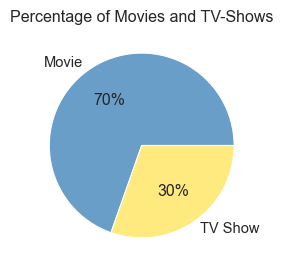

In [47]:
plt.figure(figsize=(3, 3))

plt.pie(x=x_vals, labels=y_vals, colors=["#699ec9", "#ffea80"], autopct="%1.0f%%")
plt.title("Percentage of Movies and TV-Shows")

plt.show()

###### Observations

Netflix has more than double the number of Movies compared to TV-Shows.

#### 2 Feature `country`

##### Top 10 countries based on their content count

In [48]:
fltr = nf_df["ctry_count"] == 1
content_count = nf_df.loc[fltr, "country"].value_counts().reset_index(name="count")
top_10_ctry = content_count.head(10)
top_10_ctry

,country,count
0,United States,2845
1,India,1026
2,United Kingdom,426
3,Japan,253
4,South Korea,201
5,Canada,183
6,Spain,146
7,France,126
8,Egypt,113
9,Mexico,111


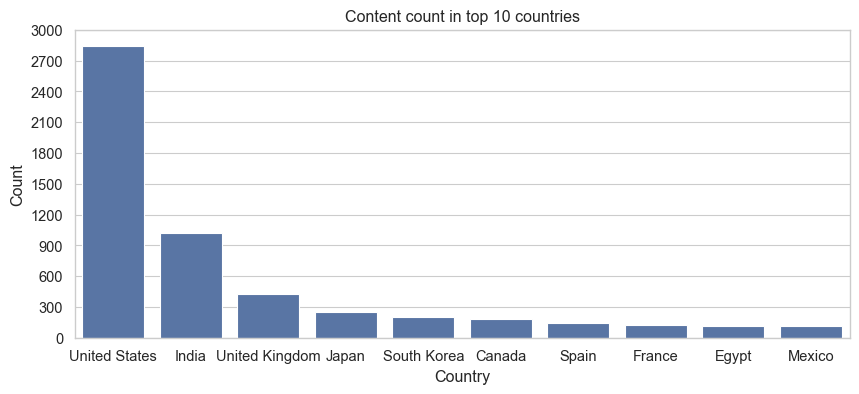

In [49]:
plt.figure(figsize=(10, 4))

sns.barplot(x=top_10_ctry["country"], y=top_10_ctry["count"])
plt.xlabel("Country")
plt.ylabel("Count")
plt.yticks(range(0, 3300, 300))
plt.title("Content count in top 10 countries")

plt.show()

Content ratio between USA (exclusively) and remaining countries (exclusively).

In [50]:
fltr = content_count["country"] == "United States"
others_df = pd.DataFrame(
    data=[["Others", content_count[~fltr]["count"].sum()]],
    columns=["country", "count"],
)
us_vs_others_df = pd.concat((content_count[fltr], others_df), ignore_index=True)
us_vs_others_df

,country,count
0,United States,2845
1,Others,3950


In [51]:
x_vals = us_vs_others_df["count"]
y_vals = us_vs_others_df["country"]

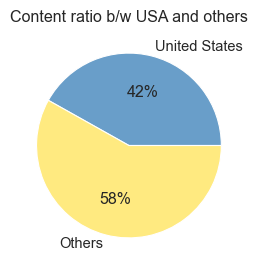

In [52]:
plt.figure(figsize=(3, 3))
plt.pie(x=x_vals, labels=y_vals, colors=["#699ec9", "#ffea80"], autopct="%1.0f%%")
plt.title("Content ratio b/w USA and others")
plt.show()

###### Observations

1. 42% of Netflix's content is produced exclusively in USA.
2. Remaining 58% is produced by rest of the countries (exclusively)

> **Note**:
>
> Term "exclusively" used in the above content not produced in collaboration with other countries.

##### Top 10 most common collaboration

In [53]:
fltr = nf_df["ctry_count"] > 1
nf_df.loc[fltr, "country"].value_counts().head(10).reset_index()

,country,count
0,"United Kingdom,United States",123
1,"Canada,United States",120
2,"Belgium,France",31
3,"Germany,United States",30
4,"China,Hong Kong",30
5,"Japan,United States",28
6,"Mexico,United States",27
7,"France,United States",26
8,"Australia,United States",24
9,"India,United States",19


##### Top 10 most collaborated countries

In [54]:
colab_count = dict()


def count_country(c_name):
    """
    Function to count number of times a country was collaborated.
    """
    if c_name is not None:
        colab_count[c_name] = colab_count.get(c_name, 0) + 1


fltr = nf_df["ctry_count"] > 1
ctry_colab = nf_df.loc[fltr, "country"].str.split(",", expand=True)
ctry_colab.map(count_country)

colab_df = pd.DataFrame(data=colab_count.items(), columns=["country", "count"])
colab_df.sort_values(by="count", ascending=False).head(10)

,country,count
79,United States,878
7,United Kingdom,389
3,France,273
4,Canada,267
10,Germany,159
15,China,96
6,Spain,89
0,Belgium,82
16,India,76
9,Australia,73


#### 3 Feature `rating`

In [55]:
nf_df["rating"].value_counts()

rating
TV-MA    3210
TV-14    2161
TV-PG     863
R         800
PG-13     490
TV-Y7     341
TV-Y      308
PG        287
TV-G      261
NR         86
Name: count, dtype: int64

In [56]:
fltr = nf_df["rating"] != "NR"
slices = nf_df.loc[fltr, "rating"].value_counts()

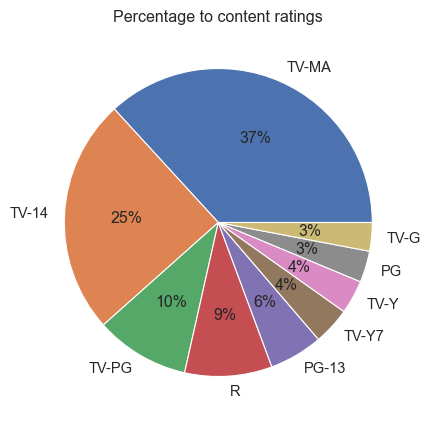

In [57]:
plt.figure(figsize=(5, 5))

plt.pie(x=slices, labels=slices.index, autopct="%1.0f%%")
plt.title("Percentage to content ratings")

plt.show()

In [58]:
fltr = nf_df["content_level"].notna()
slices = nf_df.loc[fltr, "content_level"].value_counts()

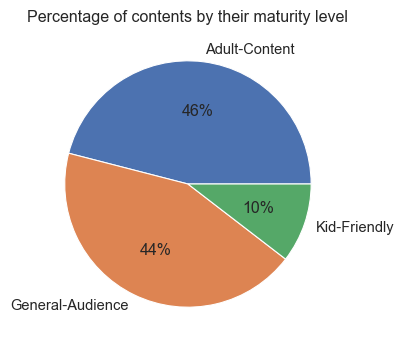

In [59]:
plt.figure(figsize=(4, 4))

plt.pie(x=slices, labels=slices.index, autopct="%1.0f%%")
plt.title("Percentage of contents by their maturity level")

plt.show()

###### Observations

1. Netflix has only 10% of its contents suitable for kids.
2. Majority of the contents, around 46%, are only suitable for adults.
3. Overall 54% of the contents are suitable for general audience.

#### 4 Feature `listed_in`

Word cloud code ref:  
https://www.geeksforgeeks.org/python/generating-word-cloud-python/

Identify common genre in the content using word cloud.

In [60]:
stop_words = ["international", "independent", "movies", "tv", "shows", "&"]

# Prepare text for word cloud.
genre_text = " ".join(nf_df["listed_in"].str.replace(",", "").tolist())
genres = [word for word in genre_text.split() if word.lower() not in stop_words]
genre_text = " ".join(genres)

# Build word cloud.
genre_wc = WordCloud(width=800, height=400, background_color="white").generate(genre_text)

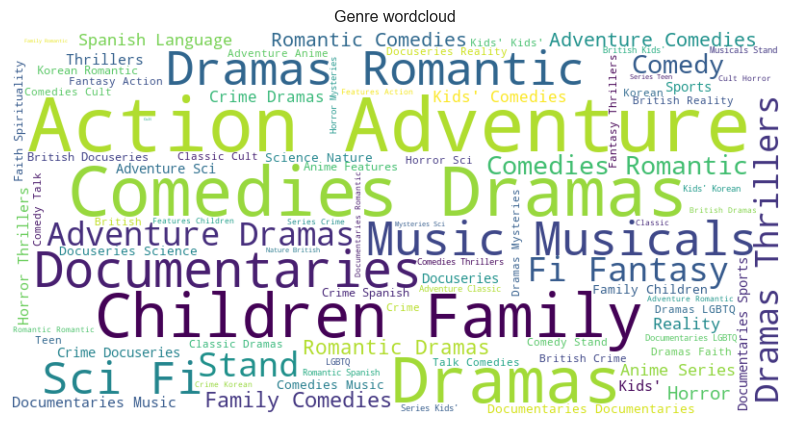

In [61]:
plt.figure(figsize=(10, 5))

plt.imshow(genre_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Genre wordcloud")

plt.show()

###### Observations

Some common genres found in the content are Action Adventure, Comedies Dramas, Documentaries as seen in the above word cloud.

Find common genres between Movies and TV-Shows using word cloud.

In [62]:
fltr = nf_df["type"] == "Movie"

# Prepare text for word cloud.
movg_text = " ".join(nf_df.loc[fltr, "listed_in"].str.replace(",", "").tolist())
mov_genres = [word for word in movg_text.split() if word.lower() not in stop_words]
movg_text = " ".join(mov_genres)

tvsg_text = " ".join(nf_df.loc[~fltr, "listed_in"].str.replace(",", "").tolist())
tvs_genres = [word for word in tvsg_text.split() if word.lower() not in stop_words]
tvsg_text = " ".join(tvs_genres)

# Build word cloud.
movg_wc = WordCloud(width=800, height=400, background_color="white").generate(movg_text)
tvsg_wc = WordCloud(width=800, height=400, background_color="white").generate(tvsg_text)

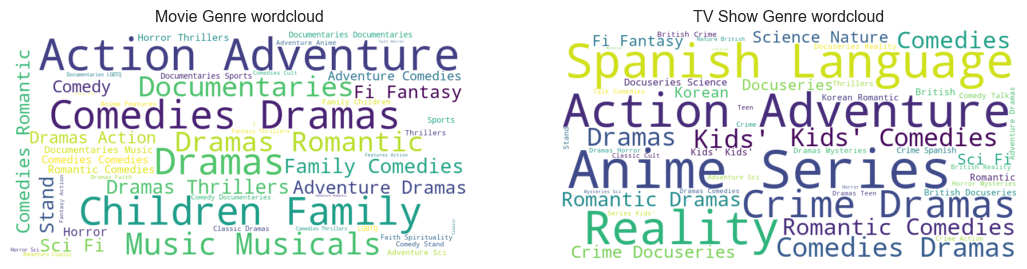

In [63]:
plt.figure(figsize=(13, 6))

plt.subplot(1, 2, 1)
plt.imshow(movg_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Movie Genre wordcloud")

plt.subplot(1, 2, 2)
plt.imshow(tvsg_wc, interpolation="bilinear")
plt.axis("off")
plt.title("TV Show Genre wordcloud")

plt.show()

###### Observations

1. Popular genres in Movies: Action Adventure, Comedies Drama, Dramas, Family content, Documentaries, etc.
2. Popular genres in TV-Shows: Action Adventure, Anime Series, Comedies, Dramas, Crime, Reality, etc.

### 4.2 Numerical Features

#### 1 Feature `date_added`

In [64]:
fltr = nf_df["date_added"].notna()
da_srs = nf_df.loc[fltr, "date_added"]

pv_df = pd.crosstab(index=da_srs.dt.month.astype(int), columns=da_srs.dt.year.astype(int))

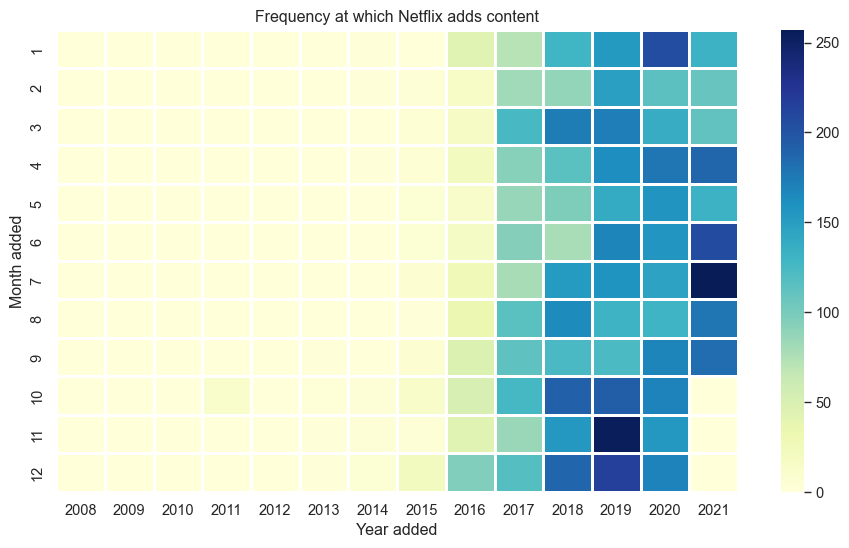

In [65]:
plt.figure(figsize=[11, 6])

sns.heatmap(pv_df, cmap="YlGnBu", linecolor="white", linewidth=1)
plt.xlabel("Year added")
plt.ylabel("Month added")
plt.title("Frequency at which Netflix adds content")

plt.show()

###### Observations

1. As such there is no significant pattern on how Netflix refreshes (`date_added`) its library.
2. In the last quarter Netflix adds more content to its platform.

#### 2 Feature `release_year`

In [66]:
ry_stats = nf_df["release_year"].describe()
ry_stats

count    8807.000000
mean     2014.178267
std         8.818469
min      1925.000000
25%      2013.000000
50%      2017.000000
75%      2019.000000
max      2021.000000
Name: release_year, dtype: float64

In [67]:
latest_content = int(ry_stats["max"].item())
oldest_content = int(ry_stats["min"].item())

print(f"Content release year varies between ({oldest_content}, {latest_content}).")

Content release year varies between (1925, 2021).


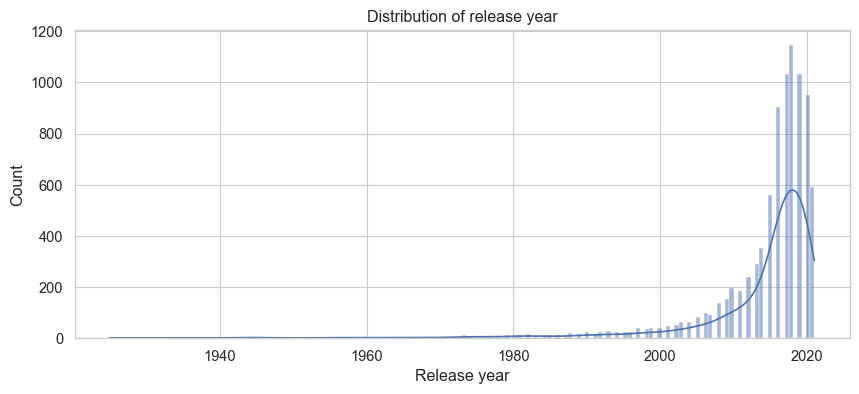

In [68]:
plt.figure(figsize=(10, 4))

sns.histplot(data=nf_df, x="release_year", kde=True)
plt.xlabel("Release year")
plt.title("Distribution of release year")

plt.show()

###### Observations

1. Most of the content available in Netflix are released after 2000.

#### 3 Feature `duration`

In [69]:
fltr = nf_df["duration_in_min"] != -1
nf_df.loc[fltr, "duration_in_min"].describe()

count    6131.000000
mean       99.564998
std        28.289504
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_in_min, dtype: float64

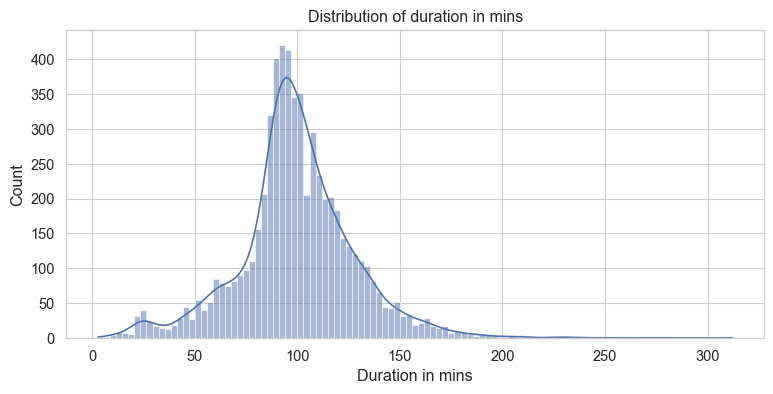

In [70]:
plt.figure(figsize=(9, 4))

sns.histplot(data=nf_df[fltr], x="duration_in_min", kde=True)
plt.xlabel("Duration in mins")
plt.title("Distribution of duration in mins")

plt.show()

In [71]:
duration_in_hrs = [-1, 60, 120, 180, 240, 300, 360]
duration_labels = [1, 2, 3, 4, 5, 6]
fltr = nf_df["duration_in_min"] != -1

nf_df["duration_in_hrs"] = pd.cut(
    nf_df.loc[fltr, "duration_in_min"],
    bins=duration_in_hrs,
    labels=duration_labels,
)

nf_df["duration_in_hrs"].value_counts().reset_index(name="count")

,duration_in_hrs,count
0,2,4502
1,3,1095
2,1,487
3,4,44
4,5,2
5,6,1


Plot the boxplot after discarding the outliers with duration greater than 4 hours.

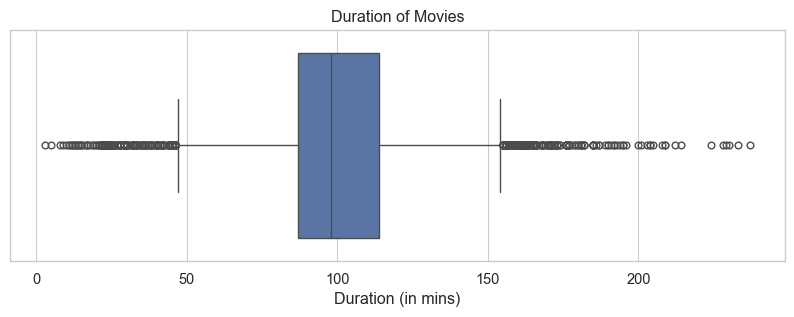

In [72]:
plt.figure(figsize=(10, 3))

fltr = (nf_df["duration_in_min"] != -1) & (nf_df["duration_in_hrs"] < 5)
sns.boxplot(data=nf_df[fltr], x="duration_in_min")
plt.xlabel("Duration (in mins)")
plt.title("Duration of Movies")

plt.show()

### 4.3 High Cardinality Features

#### 1 Feature `title`

Identify common words used in the title using word cloud.

In [73]:
# Prepare text for word cloud.
title_text = " ".join(nf_df["title"].tolist())

# Build word cloud.
title_wc = WordCloud(width=800, height=400, background_color="white").generate(title_text)

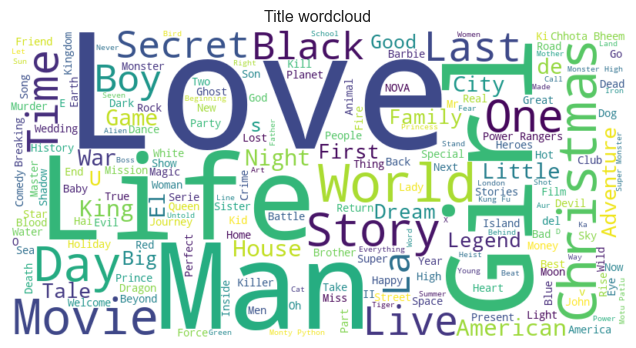

In [74]:
plt.figure(figsize=(8, 4))

plt.imshow(title_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Title wordcloud")

plt.show()

##### Common words in title b/w Movies and TV-Shows.

In [75]:
# Prepare text for word cloud.
mov_text = " ".join(nf_df.loc[nf_df["type"] == "Movie", "title"].tolist())
tvs_text = " ".join(nf_df.loc[nf_df["type"] == "TV Show", "title"].tolist())

# Build word cloud.
mov_wc = WordCloud(width=800, height=400, background_color="white").generate(mov_text)
tvs_wc = WordCloud(width=800, height=400, background_color="white").generate(tvs_text)

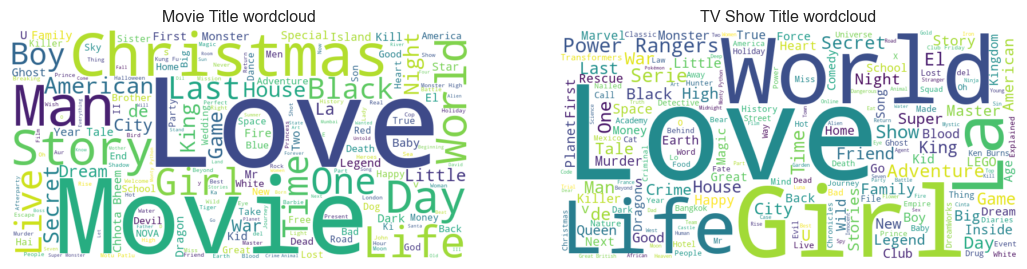

In [76]:
plt.figure(figsize=(13, 6))

plt.subplot(1, 2, 1)
plt.imshow(mov_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Movie Title wordcloud")

plt.subplot(1, 2, 2)
plt.imshow(tvs_wc, interpolation="bilinear")
plt.axis("off")
plt.title("TV Show Title wordcloud")

plt.show()

###### Observations

Most common word used in the title of Movie or TV-Shows is "Love".

#### 2 Feature `director`

##### Top 10 Director's with most number of content

In [77]:
top_dirs = (
    nf_df.groupby("director")
    .agg(count=("title", "count"))
    .reset_index()
    .sort_values(by="count", ascending=False)
    .head(10)
)
top_dirs

,director,count
3466,Rajiv Chilaka,19
1863,"Jan Suter,Raúl Campos",19
4064,Suhas Kadav,16
2704,Marcus Raboy,16
1908,Jay Karas,14
765,Cathy Garcia-Molina,13
4467,Youssef Chahine,12
2771,Martin Scorsese,12
1905,Jay Chapman,12
4042,Steven Spielberg,11


##### Top 10 director's in TV-Shows

In [78]:
fltr = nf_df["type"] == "TV Show"

top_tvs_dirs = (
    nf_df[fltr]
    .groupby(["director"])
    .agg(count=("title", "count"))
    .reset_index()
    .sort_values(by="count", ascending=False)
    .head(5)
)
top_tvs_dirs

,director,count
8,Alastair Fothergill,3
88,Iginio Straffi,2
86,Hsu Fu-Chun,2
196,Shin Won-Ho,2
201,Stan Lathan,2


##### Movies with most number of directors

In [79]:
fltr = nf_df["dir_count"] == 10
nf_df.loc[fltr, ["title", "director", "country", "release_year", "dir_count"]]

,title,director,country,release_year,dir_count
3485,Sturgill Simpson Presents Sound & Fury,"Arthell Isom,Elsa Nakamichi,Hajime Sasaki,Henr...",United States,2019,10.0
6624,Don Quixote: The Ingenious Gentleman of La Mancha,"Alana Waksman,Austin Kolodney,Brandon Somerhal...",United States,2015,10.0
7164,Kahlil Gibran's The Prophet,"Bill Plympton,Gaëtan Brizzi,Joan C. Gratz,Joan...","Canada,France,Lebanon,Qatar,United States",2014,10.0


#### 3 Feature `cast`

##### Director's favorite cast

Director who worked with same cast most number of times.

In [80]:
dir_fav_cast_df = (
    nf_df.groupby(["director", "type", "cast"])
    .size()
    .reset_index(name="count")
    .sort_values(by="count", ascending=False)
    .head(10)
)
dir_fav_cast_df

,director,type,cast,count
4194,Rajiv Chilaka,Movie,"Jigna Bhardwaj,Julie Tejwani,Mousam,Rajesh Kav...",12
4255,Rathindran R Prasad,Movie,"Aishwarya Rajesh,Avantika Vandanapu,Madhuri,Pa...",4
4547,S.S. Rajamouli,Movie,"Anushka Shetty,Nassar,Prabhas,Ramya Krishnan,R...",4
1466,Edward Cotterill,Movie,Rachael Stirling,3
2252,Jay Karas,Movie,Bill Burr,3
3041,Louis C.K.,Movie,Louis C.K.,3
598,B. V. Nandini Reddy,Movie,"Aishwarya,Jagapathi Babu,Lakshmi,Naga Shourya,...",3
540,Ashwin Saravanan,Movie,"Anish Kuruvilla,David Solomon Raja,Parvathi T,...",3
179,Alastair Fothergill,TV Show,David Attenborough,3
3539,Mike Gunther,Movie,"Bertrand-Xavier Corbi,Chris Mulkey,Fernando Ch...",3


###### Observations

1. Skipping first three rows since they are same content in different languages.
2. Edward Cotterill casted Rachael Stirling three time.

## 5 Bivariate Analysis

Under Bivariate Analysis lets analyze following combination of features.

1. Categorical vs Categorical
2. Categorical vs Numerical
3. Numerical vs Numerical

### 5.1 Categorical vs Categorical

#### 1 Features `rating` vs `type`

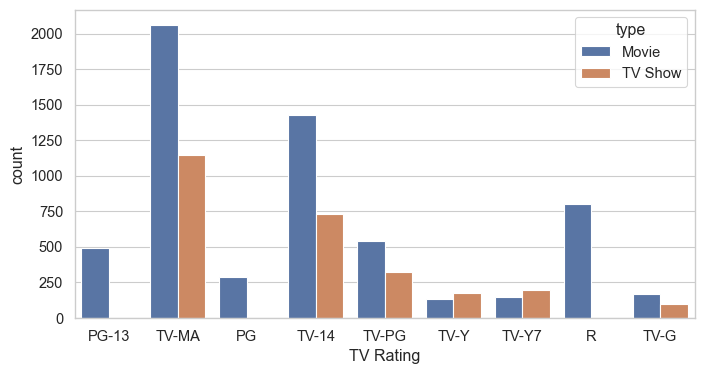

In [81]:
fltr = nf_df["rating"] != "NR"  # Not Rated.

plt.figure(figsize=(8, 4))
sns.countplot(data=nf_df[fltr], x="rating", hue="type")
plt.xlabel("TV Rating")

plt.show()

###### Observations

1. More number of kid-friendly (TV-7, TV-Y7) TV-Shows are available compared to Movies.
2. Some ratings are specific to Movies, like PG-13 and R, hence no count for TV-Shows.

#### 2 Features `country` vs `rating`

In [82]:
top_5_countries = ["United States", "India", "United Kingdom", "Japan", "South Korea"]

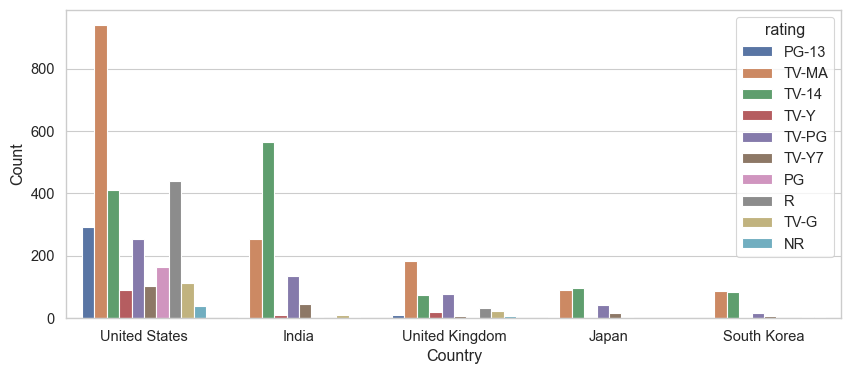

In [83]:
plt.figure(figsize=(10, 4))

fltr = (nf_df["rating"] != "NA") & (nf_df["country"].isin(top_5_countries))
sns.countplot(data=nf_df[fltr], x="country", hue="rating")
plt.xlabel("Country")
plt.ylabel("Count")

plt.show()

###### Observations

1. Since this rating system is followed in United States and United Kingdom, they have contents in every category.
2. Rest of the countries follow fewer rating categories and can be better visualized in below graphs.

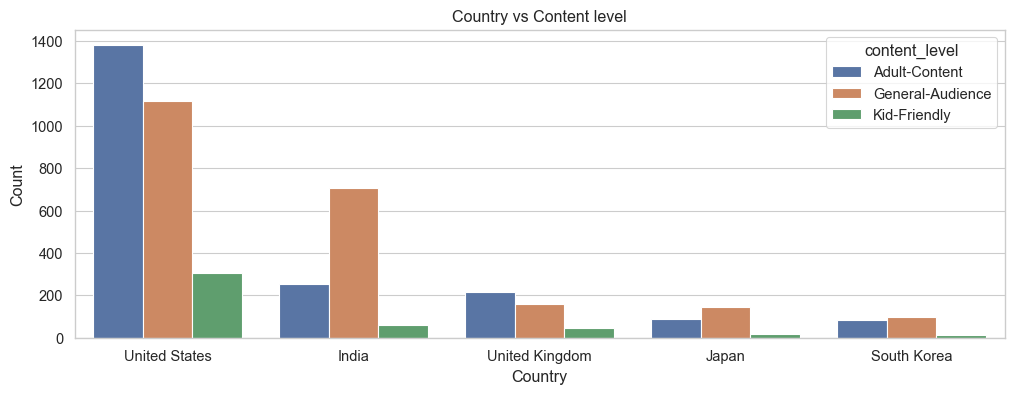

In [84]:
plt.figure(figsize=(12, 4))

fltr = nf_df["country"].isin(top_5_countries)
sns.countplot(data=nf_df[fltr], x="country", hue="content_level")
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Country vs Content level")

plt.show()

###### Observations

1. United States and United Kingdom produces the most Adult content.
2. India, Japan, South Korea mostly produces content suitable for general audience.

#### 3 Features `country` vs `type`

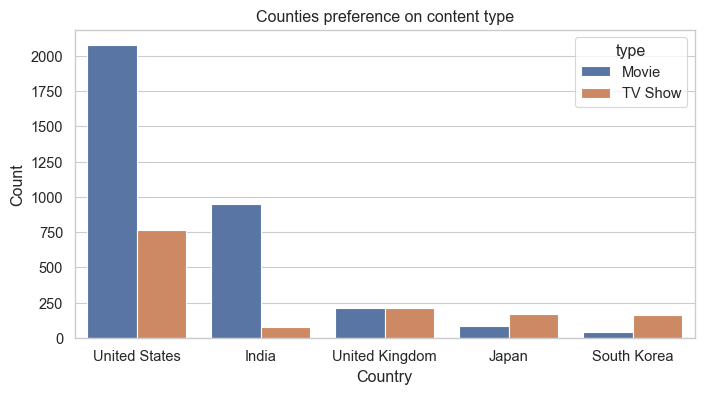

In [85]:
plt.figure(figsize=(8, 4))

fltr = nf_df["country"].isin(top_5_countries)
sns.countplot(data=nf_df[fltr], x="country", hue="type")
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Counties preference on content type")

plt.show()

###### Observations

1. United States and India prefers Movies over TV-Shows.
2. Japan, South Korea prefers TV-Shows over Movies.
3. United Kingdom prefers both type of contents.

#### 4 Features `country` vs `listed_in`

##### Top 3 genres in Top 5 countries

In [86]:
fltr = nf_df["country"].isin(top_5_countries)

# Fetch all popular genres.
pop_genres = nf_df[fltr].groupby(["country"])["listed_in"].value_counts().reset_index()

# Fetch top 3 popular genres.
top_3_genres = pop_genres.groupby(["country"]).head(3)
top_3_genres.sort_values(by=["country", "count"], ascending=[True, False])

,country,listed_in,count
0,India,"Comedies, Dramas, International Movies",121
1,India,"Dramas, International Movies",119
2,India,"Dramas, Independent Movies, International Movies",108
92,Japan,"Anime Series, International TV Shows",75
93,Japan,"Action & Adventure, Anime Features, Internatio...",32
94,Japan,"Anime Series, Kids' TV",12
148,South Korea,"International TV Shows, Korean TV Shows, Roman...",63
149,South Korea,"Crime TV Shows, International TV Shows, Korean...",20
150,South Korea,"International TV Shows, Korean TV Shows, TV Dr...",18
185,United Kingdom,Documentaries,41


##### Observations

1. International Movies, Dramas, Comedies are most common genre among the content produced in India.
2. Japan loves Anime.
3. South Korea prefers TV Shows over movies.
4. United States and United Kingdom produces most number of Documentaries.

In [87]:
fltr = nf_df["country"].isin(top_5_countries)

pop_genre = (
    nf_df[fltr]
    .groupby(["country", "listed_in"])
    .agg(count=("title", "count"))
    .reset_index()
    .sort_values(by=["country", "count"], ascending=False)
)

top_genre = pop_genre.drop_duplicates(subset=["country"], keep="first")
top_genre

,country,listed_in,count
442,United States,Documentaries,251
239,United Kingdom,Documentaries,41
169,South Korea,"International TV Shows, Korean TV Shows, Roman...",63
112,Japan,"Anime Series, International TV Shows",75
31,India,"Comedies, Dramas, International Movies",121


### 5.2 Categorical vs Numerical

#### 1 Features `release_year` vs `country`

Number of movies released by top 5 countries over the years

In [88]:
release_history = (
    nf_df[nf_df["country"].isin(top_5_countries)]
    .groupby(["country"])["release_year"]
    .value_counts()
    .reset_index(name="count")
)

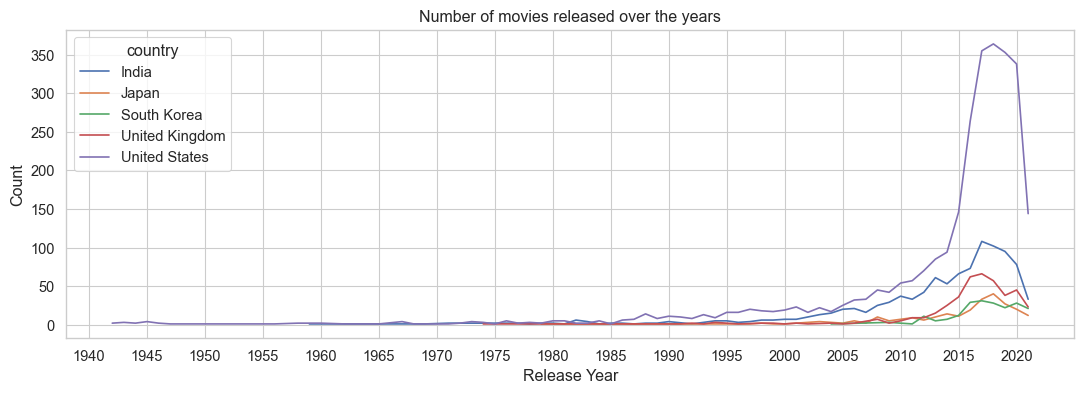

In [89]:
plt.figure(figsize=(13, 4))

sns.lineplot(data=release_history, x="release_year", y="count", hue="country")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Number of movies released over the years")
plt.xticks(range(1940, 2025, 5))

plt.show()

Lets zoom into last 20 years of data.

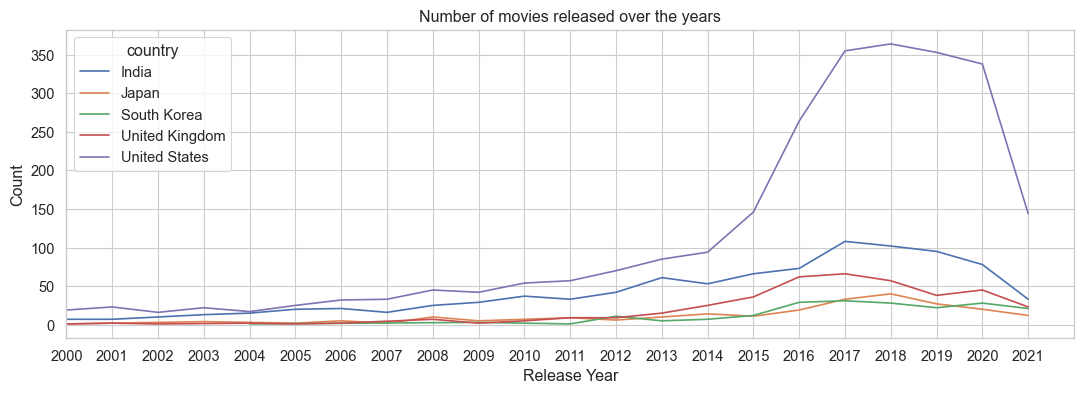

In [90]:
plt.figure(figsize=(13, 4))

sns.lineplot(data=release_history, x="release_year", y="count", hue="country")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Number of movies released over the years")
plt.xticks(range(2000, 2022))
plt.xlim(left=2000, right=2022)

plt.show()

###### Observations

1. Pre pandemic, India was **3 years behind** in the amount of movies it releases compared to USA.
2. Pandemic might have **pushed back Hollywood by 6 years**.
3. Due to Covid-19 (post 2020) there was a sharp decline in number of movies released (except South Korea).
4. South Korea did not have a major impact in movie releases during pandemic.

#### 2 Features `release_year` vs `type`

##### Decade

Type of content (Movies vs TV-Show) released over the decade

In [91]:
release_decade = [0, 1980, 1990, 2000, 2010, 2020, 2030]
release_dlables = ["<1980", "1981-90", "1991-00", "2001-10", "2011-20", ">2021"]
nf_df["release_decade"] = pd.cut(nf_df["release_year"], bins=release_decade, labels=release_dlables)

##### Quinquennium

Type of content (Movies vs TV-Show) released over the Quinquennium.

> **Note**:
>
> Quinquennium is a period of 5 years.

In [92]:
release_quinq = [0, 2000, 2005, 2010, 2015, 2020, 2025]
release_qlables = ["<2000", "2001-05", "2006-10", "2011-15", "2016-20", ">2020"]
nf_df["release_quinq"] = pd.cut(nf_df["release_year"], bins=release_quinq, labels=release_qlables)

##### Decade vs Quinquennium

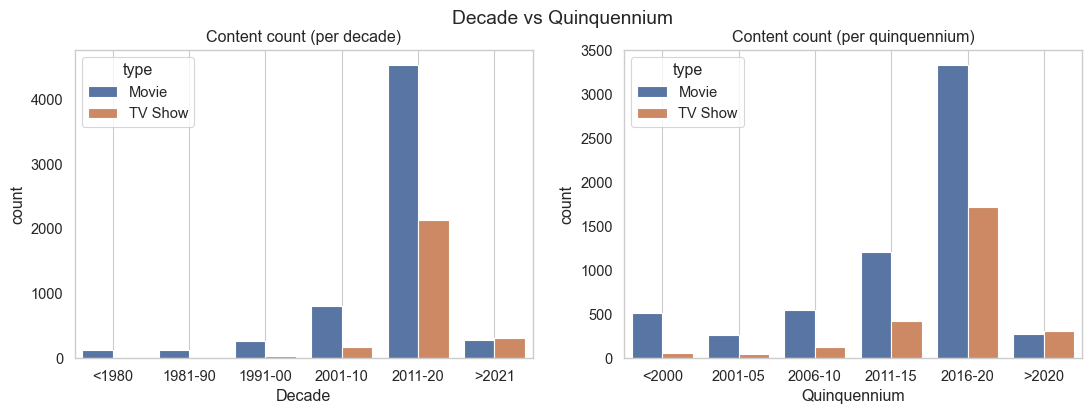

In [93]:
plt.figure(figsize=(13, 4))
plt.suptitle("Decade vs Quinquennium")

plt.subplot(1, 2, 1)
sns.countplot(data=nf_df, x="release_decade", hue="type")
plt.xlabel("Decade")
plt.title("Content count (per decade)")
plt.grid()

plt.subplot(1, 2, 2)
sns.countplot(data=nf_df, x="release_quinq", hue="type")
plt.xlabel("Quinquennium")
plt.title("Content count (per quinquennium)")
plt.grid()

plt.show()

###### Observations

1. The number of TV-shows released has grown significantly over the decades.
2. The 2016–2020 quinquennium saw the highest number of TV show releases.

Trend of content-type (Movies vs TV-Show) released over the years

In [94]:
ry_count_df = nf_df.groupby(["release_year"])["type"].value_counts().reset_index(name="count")

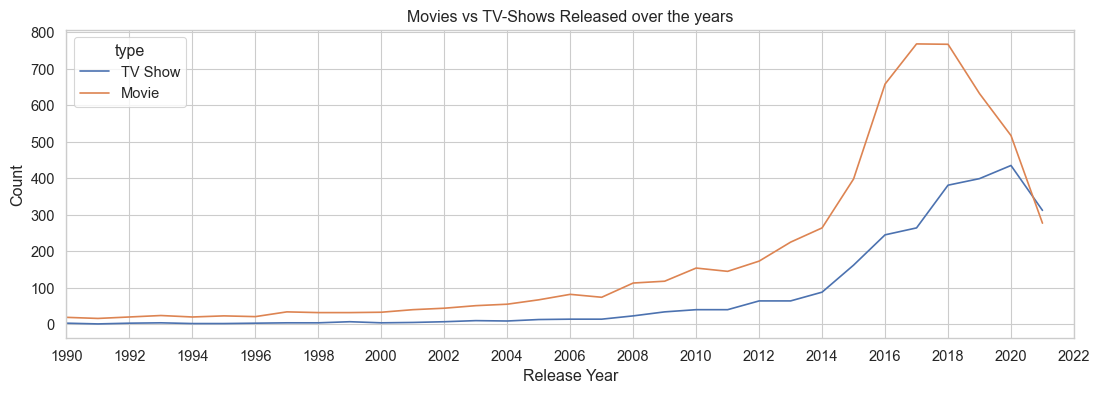

In [95]:
plt.figure(figsize=(13, 4))

sns.lineplot(data=ry_count_df, x="release_year", y="count", hue="type")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Movies vs TV-Shows Released over the years")
plt.xticks(range(1990, 2024, 2))
plt.xlim(left=1990, right=2022)

plt.show()

#### 3 Features `date_added` vs `type`

Trend of content-type (Movies vs TV-Show) added to Netflix over the years

In [96]:
ya_count_df = nf_df.groupby(nf_df["year_added"])["type"].value_counts().reset_index(name="count")

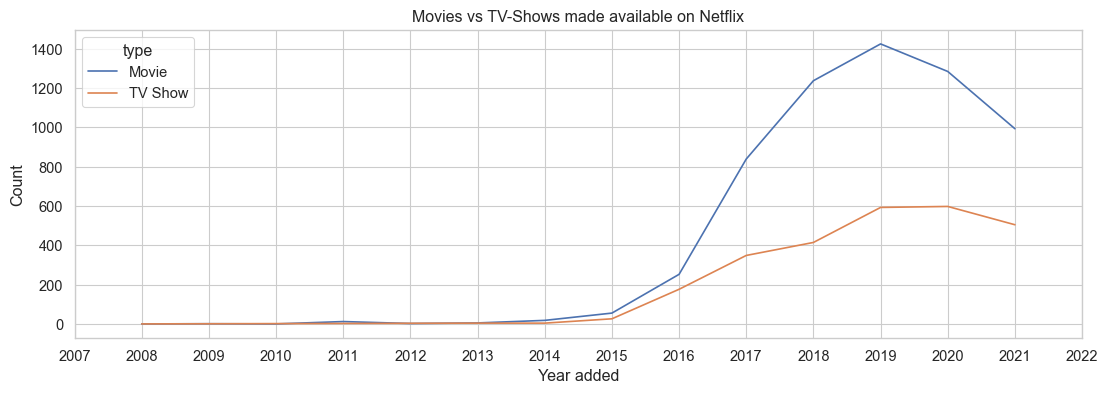

In [97]:
plt.figure(figsize=(13, 4))

sns.lineplot(data=ya_count_df, x="year_added", y="count", hue="type")
plt.xlabel("Year added")
plt.ylabel("Count")
plt.title("Movies vs TV-Shows made available on Netflix")
plt.xticks(range(2007, 2024))
plt.xlim(left=2007, right=2022)

plt.show()

###### Observations

Since 2016, Netflix is adding more Movies compared to TV-Shows.

Release trend vs Streaming trend

In [98]:
fltr1 = nf_df["release_year"] > 2006
ryc_df = (
    nf_df[fltr1].groupby(nf_df["release_year"])["type"].value_counts().reset_index(name="count")
)

In [99]:
fltr2 = nf_df["release_year"] > 2006
yac_df = nf_df[fltr2].groupby(nf_df["year_added"])["type"].value_counts().reset_index(name="count")

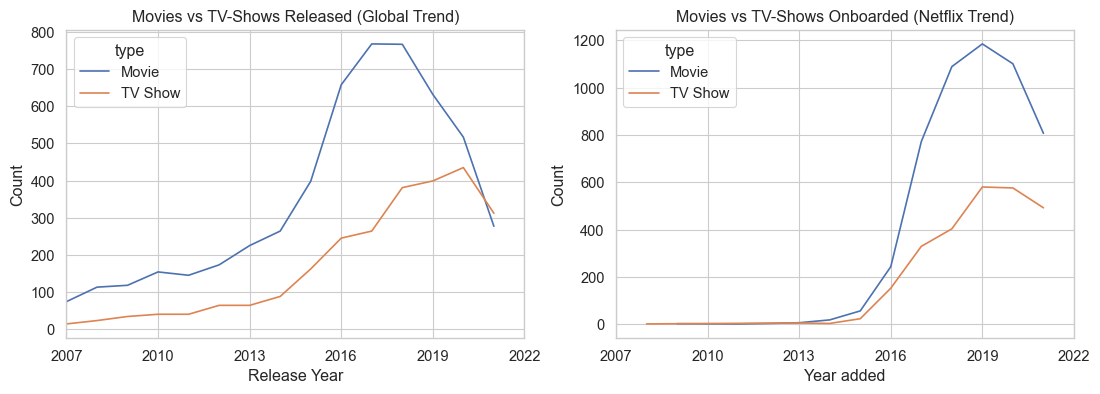

In [100]:
plt.figure(figsize=(13, 4))
ho_mtv = ["Movie", "TV Show"]

plt.subplot(1, 2, 1)
sns.lineplot(data=ryc_df, x="release_year", y="count", hue="type", hue_order=ho_mtv)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Movies vs TV-Shows Released (Global Trend)")
plt.xticks(range(2007, 2023, 3))
plt.xlim(left=2007, right=2022)

plt.subplot(1, 2, 2)
sns.lineplot(data=yac_df, x="year_added", y="count", hue="type", hue_order=ho_mtv)
plt.xlabel("Year added")
plt.ylabel("Count")
plt.title("Movies vs TV-Shows Onboarded (Netflix Trend)")
plt.xticks(range(2007, 2023, 3))
plt.xlim(left=2007, right=2022)

plt.show()

##### Observations

1. Until 2015, the trend at which Movies and TV-Shows were released did not match with the trend at which Netflix was onboarding its content.
2. Since 2015, Netflix is onboarding large number of Movies compared to TV-Shows and keeping up with the global trend.

#### 4 Features `release_year` vs `content_level`

Content level released over the Quinquennium

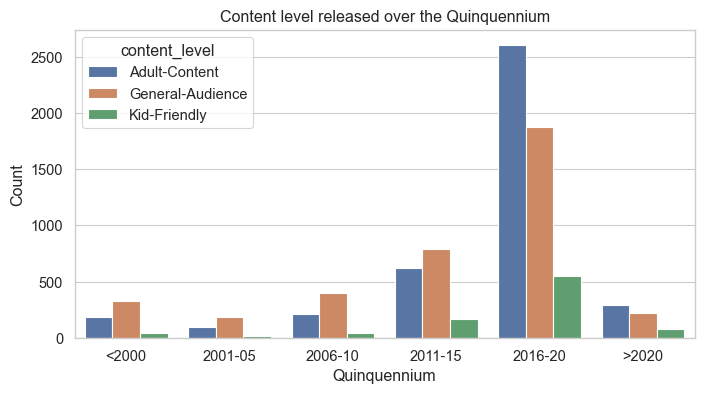

In [101]:
plt.figure(figsize=(8, 4))

sns.countplot(data=nf_df, x="release_quinq", hue="content_level")
plt.xlabel("Quinquennium")
plt.ylabel("Count")
plt.title("Content level released over the Quinquennium")

plt.show()

In [102]:
fltr = nf_df["release_year"] > 2006
cl_ry_df = (
    nf_df[fltr]
    .groupby(["release_year", "content_level"], observed=False)
    .agg(count=("title", "count"))
    .reset_index()
)

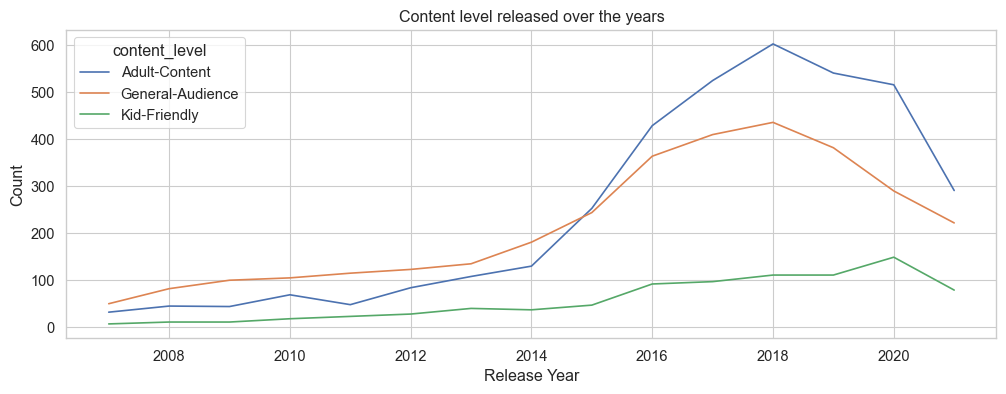

In [103]:
plt.figure(figsize=(12, 4))

sns.lineplot(data=cl_ry_df, x="release_year", y="count", hue="content_level")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Content level released over the years")

plt.show()

#### 5 Features `year_added` vs `content_level`

In [104]:
fltr = nf_df["release_year"] > 2006
cl_ya_df = (
    nf_df[fltr]
    .groupby(["year_added", "content_level"], observed=False)
    .agg(count=("title", "count"))
    .reset_index()
)

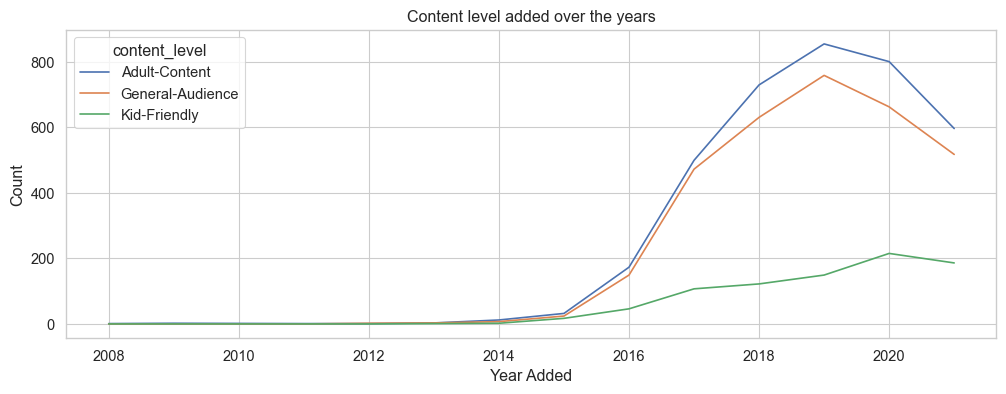

In [105]:
plt.figure(figsize=(12, 4))

sns.lineplot(data=cl_ya_df, x="year_added", y="count", hue="content_level")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.title("Content level added over the years")

plt.show()

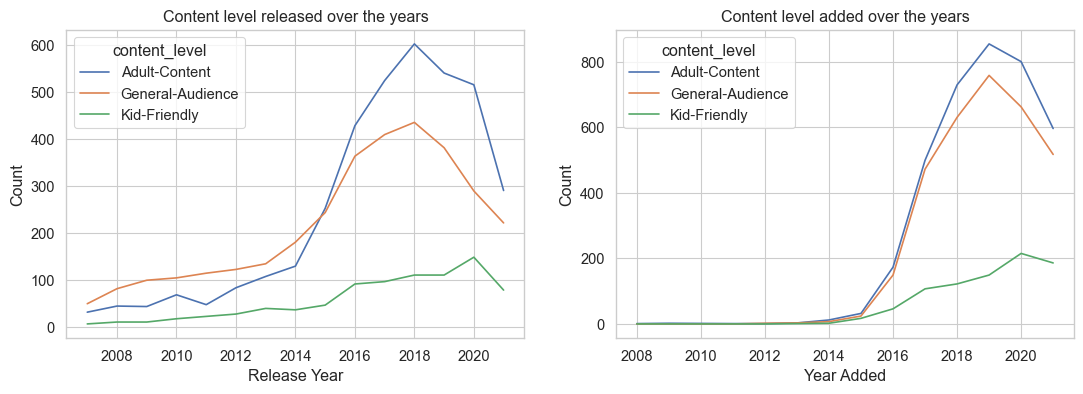

In [106]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=cl_ry_df, x="release_year", y="count", hue="content_level")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Content level released over the years")

plt.subplot(1, 2, 2)
sns.lineplot(data=cl_ya_df, x="year_added", y="count", hue="content_level")
plt.xlabel("Year Added")
plt.ylabel("Count")
plt.title("Content level added over the years")

plt.show()

###### Observations

1. Netflix is maintaining a healthy balance between the content suitable for general audience and adult content.
2. Netflix has added far less number of kid-friendly contents over the years.

### 5.3 Numerical vs Numerical

#### 1 Features `release_year` vs `duration`

Duration of content over the years

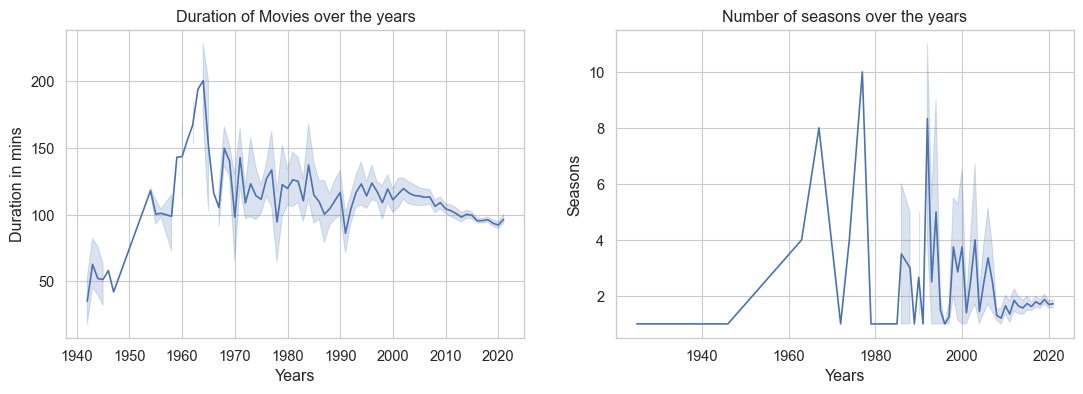

In [107]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
fltr1 = nf_df["duration_in_min"] != -1
sns.lineplot(data=nf_df[fltr1], x="release_year", y="duration_in_min")
plt.xlabel("Years")
plt.ylabel("Duration in mins")
plt.title("Duration of Movies over the years")

plt.subplot(1, 2, 2)
fltr2 = nf_df["duration_in_ssn"] != -1
sns.lineplot(data=nf_df[fltr2], x="release_year", y="duration_in_ssn")
plt.xlabel("Years")
plt.ylabel("Seasons")
plt.title("Number of seasons over the years")

plt.show()

Lets zoom into last 20 years of data.

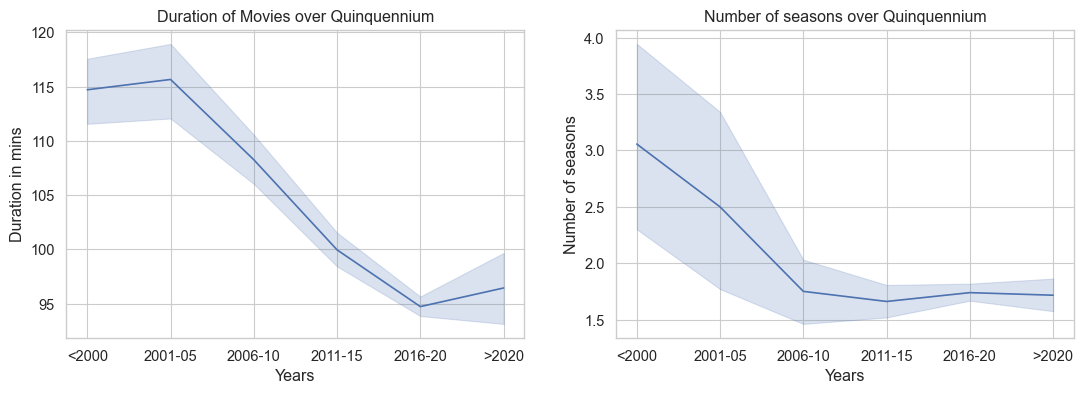

In [108]:
plt.figure(figsize=(13, 4))

plt.subplot(1, 2, 1)
sns.lineplot(data=nf_df[fltr1], x="release_quinq", y="duration_in_min")
plt.xlabel("Years")
plt.ylabel("Duration in mins")
plt.title("Duration of Movies over Quinquennium")

plt.subplot(1, 2, 2)
sns.lineplot(data=nf_df[fltr2], x="release_quinq", y="duration_in_ssn")
plt.xlabel("Years")
plt.ylabel("Number of seasons")
plt.title("Number of seasons over Quinquennium")

plt.show()

##### Observations

1. Over the years (1940-2021) average duration of Movies were in consistent.
2. In last two decade the average is continuously falling with current average ~95 mins.
3. Over the years (1960-2021) average number-of-seasons of TV-Shows were in consistent.
4. In last two decade the average has reduced to 1 season per TV-Show.

#### 2 Features `release_year` vs `date_added`

Netflix started its online streaming service since 2007.

Lets observe the delay (difference between release year `release_year` and streaming year `date_added`) in onboarding a content onto Netflix since its release.

In [109]:
fltr = (nf_df["year_added"] > 2006) & (nf_df["release_year"] > 2006)

st_df = nf_df[fltr].copy()  # Streaming DataFrame
st_df["delay"] = st_df["year_added"] - st_df["release_year"]

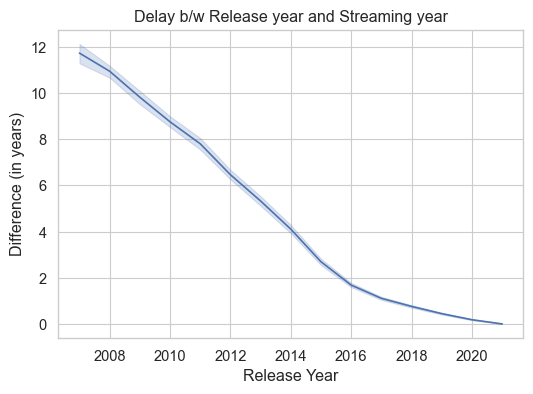

In [110]:
plt.figure(figsize=(6, 4))

sns.lineplot(data=st_df, x="release_year", y="delay")
plt.xlabel("Release Year")
plt.ylabel("Difference (in years)")
plt.title("Delay b/w Release year and Streaming year")

plt.show()

###### Observations

1. Over the years, there is a significant reduction in delay of onboarding new content into Netflix.
2. Since 2016 Netflix is offering latest content on it streaming platform.

## 6 Multivariate Analysis

Under Multivariate Analysis lets analyze following combinations of features:

1. Numerical vs Numerical vs Categorical
2. Categorical vs Categorical vs Numerical
3. Numerical vs Numerical vs Numerical

### 6.1 Numerical vs Numerical vs Categorical

#### 1 Features `release_year` vs `cast_count` vs `type`

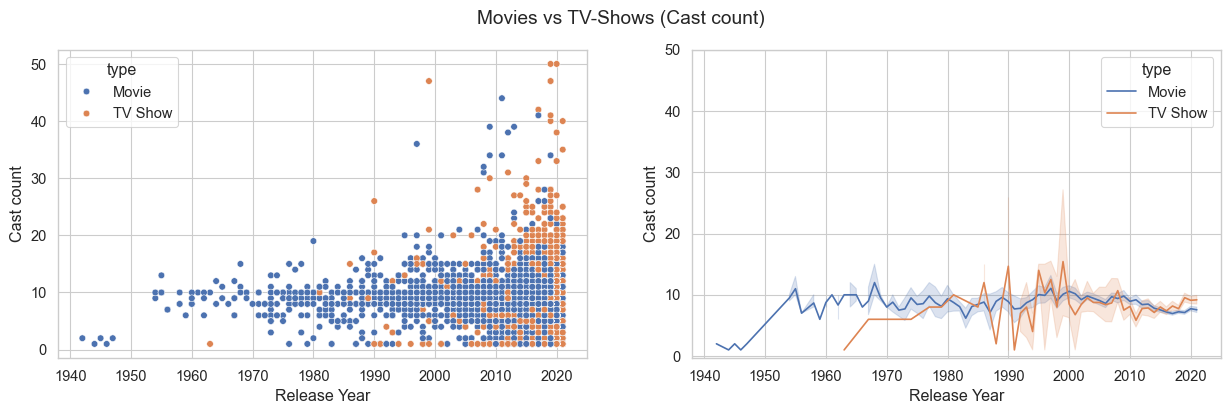

In [111]:
plt.figure(figsize=(15, 4))
plt.suptitle("Movies vs TV-Shows (Cast count)")

plt.subplot(1, 2, 1)
sns.scatterplot(data=nf_df, x="release_year", y="cast_count", hue="type")
plt.xlabel("Release Year")
plt.ylabel("Cast count")

plt.subplot(1, 2, 2)
sns.lineplot(data=nf_df, x="release_year", y="cast_count", hue="type")
plt.xlabel("Release Year")
plt.ylabel("Cast count")
plt.yticks(range(0, 60, 10))

plt.show()

###### Observations

1. TV-Shows have higher cast count compared to Movies.
2. Over the years number of casts (popular) in TV-Shows are increasing but the movies have consistent number of popular casts.

#### 2 Features `release_year` vs `date_added` vs `type`

Lets observe the delay in onboarding a Movie vs TV-Show onto Netflix since its release.

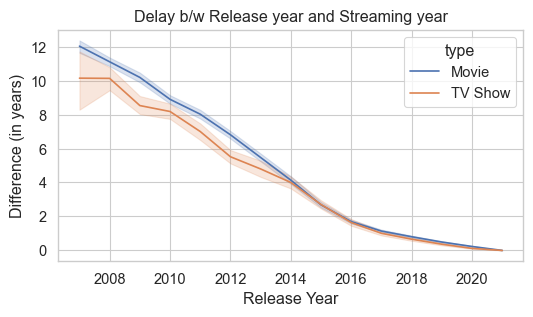

In [112]:
plt.figure(figsize=(6, 3))

sns.lineplot(data=st_df, x="release_year", y="delay", hue="type")
plt.xlabel("Release Year")
plt.ylabel("Difference (in years)")
plt.title("Delay b/w Release year and Streaming year")

plt.show()

###### Observations

TV-Shows are on boarded sooner after its release compared to Movies.

## 7 Conclusion

Lets conclude this EDA by summarizing the Business Insights and Recommendations.

### 7.1 Business Insights

Summary of business insights derived from above EDA is listed under below sections.

1. Interesting Patterns
2. Content Insights
3. Market / Demographic Insights

#### 1 Interesting Patterns

1. Since 2007, Netflix's inception of streaming service, difference between release year and streaming year (year when content started streaming) have drastically reduced indicating that **Netflix is offering latest content** to its viewers.
2. Netflix is maintaining a healthy balance between the contents suitable for general-audience and adult-content but has added far less number of kid-friendly contents over the years.
3. Pandemic might have **pushed back Hollywood by 6 years**.
4. South Korea did not have a major impact in movie releases during pandemic.
5. TV-Shows are on boarded sooner after its release compared to Movies.

#### 2 Content Insights

1. Netflix library is made up of 70% movies and 30 % TV-Shows.
2. Since 2015, Netflix is adding more Movies compared to TV-Shows.
3. Content demographics:
    1. 46% of the contents are only suitable for Adults
    2. 54% of the contents are suitable for general audience.
    3. only 10% of its contents are suitable for kids.
4. More number of kid-friendly (TV-7, TV-Y7) TV-Shows are available compared to Movies.
5. Some common genres found in the content are:
    1. Action Adventure
    2. Comedies Dramas
    3. Documentaries
    4. Dramas
6. Common genres in Movies: Action Adventure, Comedies Drama, Dramas, Family content, Documentaries, etc.
7. Common genres in TV-Shows: Action Adventure, Anime Series, Comedies, Dramas, Crime, Reality, etc.
8. The number of TV-Shows released has grown significantly over the decades.

#### 3 Market / Demographic Insights

1. Based on the content count, Netflix is majorly streaming content for these countries:
    1. United States
    2. India
    3. United Kingdom
    4. Japan
    5. South Korea.
2. 42% of its content is produced in United States and remaining 58% are from other countries.
3. Countries that collaborated the most number of time:
    1. United Kingdom and United States collaborated 123 time to produce content.
    2. Canada and United States collaborated 120 time to produce content.
4. Post pandemic, there is a significant reduction in total number of movies released by Hollywood (USA).

### 7.2 Recommendations

Since dataset **does not contain any user (viewer) feedbacks** these recommendations are mostly based on the nature of content acquired over the years on the platform.

1. Most of the content is Netflix library is focused at US audience. In order to diversify the market, Netflix must stream more local content. As seen post pandemic number of movies produced by USA has drastically reduced. Focusing heavily one market is not sustainable for a business.
2. Content must be tailored to the taste of viewers from different countries. For example:
    1. United States and India releases more Movies compared to TV-Shows.
    2. Japan and South Korea releases more TV-Shows compared to Movies.
3. Continue the current trend of acquiring latest content with minimal delay between release date and streaming date.
4. Continue the current balance maintained between the general-audience-content and adult-content but also increase kid-friendly content.
5. In last 20 years the average duration of a content has reduced to ~95 minutes, hence Netflix must acquire content lower/close this limit.